# Lesson 1.1: What is an image?

In [1]:
#!pip3 list
import sys
sys.executable

'/home/dl-smurfette/cds-vision-smurfette/cv101/bin/python'

In [2]:
import os
import cv2
%matplotlib inline

In [3]:
path_to_image = os.path.join("..", "img", "trex.png")
## or
# fpath = "../img/trex.png"

In [4]:
image = cv2.imread(path_to_image)

In [5]:
print("[INFO] width: {} pixels".format(image.shape[1]))
print("[INFO] height: {} pixels".format(image.shape[0]))
print("[INFO] channel: {}".format(image.shape[2]))

[INFO] width: 350 pixels
[INFO] height: 228 pixels
[INFO] channel: 3


In [6]:
print(image[:10,:10,0])

[[254 254 254 254 254 254 254 254 254 254]
 [254 254 254 254 254 254 254 254 254 254]
 [254 254 254 254 254 254 254 254 254 254]
 [254 254 254 254 254 254 254 254 254 254]
 [254 254 254 254 254 254 254 254 254 254]
 [254 254 254 254 254 254 254 254 254 254]
 [254 254 254 254 254 254 254 254 254 254]
 [254 254 254 254 254 254 254 254 254 254]
 [254 254 254 254 254 254 254 254 254 254]
 [254 254 254 254 254 254 254 254 254 254]]


### Dealing with constraints from coding environments
If you run code from the command line interface (CLI) use `cv2.imshow("Image", image)`. Alternatively, if you are running Jupyter Notebook locally, then use the following (remove `#`)

In [7]:
#cv2.imshow("Image", image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

Finally, if you are using JupyterHub at `worker02` then use `jimshow()` from our utility library

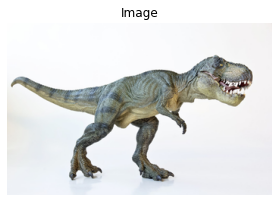

In [8]:
from imutils import jimshow
jimshow(image, "Image")

In [9]:
(fpath, _) = os.path.split(path_to_image)
fout = os.path.join(fpath, "newimage.jpg")
cv2.imwrite(fout, image);

In [10]:
# clean-up
os.remove(fout)

### Reverse tuples!!!
RGB is BGR in `cv2`

In [11]:
(b, g, r) = image[0, 0]
print("[INFO] pixels at (0, 0) - Red: {}, Green {}, Blue: {}".format(r,g,b))

[INFO] pixels at (0, 0) - Red: 254, Green 254, Blue: 254


Manipulate image color for pixel

In [12]:
image[0, 0] = (0, 0, 255)
(b, g, r) = image[0, 0]
print("[INFO] pixels at (0, 0) - Red: {}, Green {}, Blue: {}".format(r,g,b))

[INFO] pixels at (0, 0) - Red: 255, Green 0, Blue: 0


Grab 100x100 pixel region

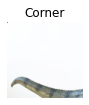

In [13]:
corner = image[0:100, 0:100]
jimshow(corner, "Corner")

Change color of 100x100 pixel region

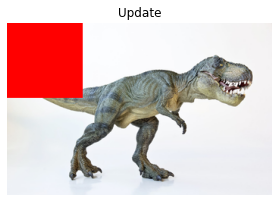

In [14]:
image[0:100,0:100] = (0, 0, 255)
jimshow(image, "Update")

# Lesson 1.2: Drawing

# Lesson 1.3: Image translation

In [15]:
import numpy as np
import cv2
import imutils

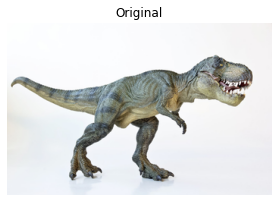

In [16]:
fpath = os.path.join("..", "img", "trex.png")
image = cv2.imread(fpath)
jimshow(image, "Original")

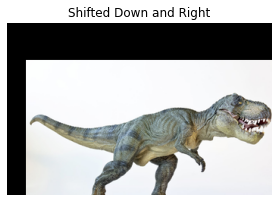

In [17]:
T = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(image, T, (image.shape[1], image.shape[0]))
jimshow(shifted, "Shifted Down and Right")

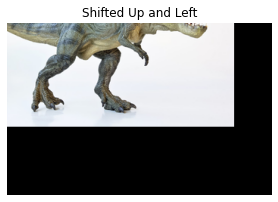

In [18]:
T = np.float32([[1, 0, -50], [0,1,-90]])
shifted = cv2.warpAffine(image, T, (image.shape[1], image.shape[0]))
jimshow(shifted, "Shifted Up and Left")

shifting with a function from `imutils`

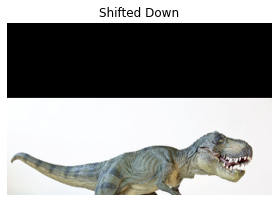

In [19]:
shifted = imutils.translate(image, 0, 100)
jimshow(shifted, "Shifted Down")

## Digression 1.3.1: Translation matrix

In [20]:
import numpy as np
import matplotlib.pyplot as plt

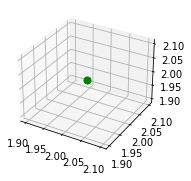

In [21]:
(x0, y0, z0) = 2, 2, 2
fig = plt.figure()
ax = fig.add_subplot(121,projection='3d')
ax.scatter(x0, y0, z0,color="g", s=50);

In [22]:
(tx, ty, tz) = 2, 2, 1
P = np.array([x0, y0, z0, 1])
T = np.array([[1, 0, 0, tx], [0, 1, 0, ty], [0, 0, 1, tz], [0, 0, 0, 1]])
Q = np.dot(T,P)
print(Q)

[4 4 3 1]


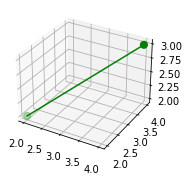

In [23]:
fig = plt.figure()
ax = fig.add_subplot(121,projection='3d')
ax.scatter([P[0], Q[0]], [P[1], Q[1]], [P[2], Q[2]],zorder=1,color="g", s=50)
ax.plot([P[0], Q[0]], [P[1], Q[1]], [P[2], Q[2]],zorder=2,color="g");